# OER botje Themaopdracht

### Notebook by [Iris Oerlemans](http://www.google.com/)

---

## Table of contents

1. [Introduction](#Introduction)

2. [The problem domain](#The-problem-domain)

4. [Business Understanding](#Business-Understanding)

5. [Required libraries](#Required-libraries)

6. [Data Understanding](#Data-Understanding)

7. [Data Prepartion](#Data-Preparation)

8. [Modeling](#Modeling)

9. [Evaluation](#Evaluation)

10. [Deployment](#Deployment)

---

# Introduction

[[ go back to the top ]](#Table-of-contents)

In dit document wordt de toepassing van GUFF met 'geitje' met een semDB verkend. Uiteindelijk wordt hiermee een chatbot gemaakt die vragen kan beantwoorden over het OER (onderwijs en examenregelement). De opdracht komt van Hogeschool Windesheim. 
Hogeschool Windesheim is een Nederlandse instelling voor hoger onderwijs. De hogeschool biedt een breed aanbod aan bachelor en masteropleidingen op onder andere het gebied van techniek en sociale wetenschappen. 
Hogeschool Windesheim heeft verschillende vestigingen met ongeveer 1800 medewerkers.


---

# Business Understanding

[[ go back to the top ]](#Table-of-contents)

Windesheim ondervind dat leerlingen het onderwijs en examenregelement (OER) onvoldoende bestuderen. Hierom wil Windesheim graag een chatbot hebben zodat leerlingen hier hun vragen aan kwijt kunnen om zo de informatie makkelijker tot zich te nemen. 

>Wat gaan we oplossen

*We lossen op dat leerlingen op een makkelijkere manier de informatie van het OER tot zich kunnen nemen*

>Weet jij wat de KSF's zijn van het project?

*Het project is succesvol als er een werkende chatbot in een python applicatie inclusief GUI gepresenteerd wordt met daarbij ook de onderbouwing van de gemaakte keuzes*

>Wat is de context van de vraag?
 
*De context van de vraag is het ontwikkelen van een chatbot die studenten helpt informatie te vinden over het OER. Studenten hebben vaak moeite om deze documenten goed te begrijpen.*

>Is er een ontwerp of een eindvisie?

*De eindvisie is om een werkende chatbot te creëeren met daarmee de mogelijkheid om vragen te kunnen stellen over het OER. Daarbij is het doel om de drempel voor het begrijpen van de belangrijke documenten te verlagen voor studenten.*

>Kan de vraag worden opgelost met de gegeven dataset

*De dataset die is aangeleverd is het OER(wordbestand). Er moet onderzoek worden gedaan hoe we deze kunnen omzetten om te kunnen gebruiken. Indien dit lukt kan de vraag worden opgelost met de gegeven dataset*

---

# Required Libraries

[[ go back to the top ]](#Table-of-contents)

*korte uitleg over de packages die je gebruikt om het project werkende te krijgen, voorbeeld van een random notebook online:*

If you don't have Python on your computer, you can use the [Anaconda Python distribution](http://continuum.io/downloads) to install most of the Python packages you need. Anaconda provides a simple double-click installer for your convenience.

This notebook uses several Python packages that come standard with the Anaconda Python distribution. The primary libraries that we'll be using are:

* **NumPy**: Provides a fast numerical array structure and helper functions.
* **pandas**: Provides a DataFrame structure to store data in memory and work with it easily and efficiently.
* **scikit-learn**: The essential Machine Learning package in Python.
* **matplotlib**: Basic plotting library in Python; most other Python plotting libraries are built on top of it.
* **Seaborn**: Advanced statistical plotting library.
* **watermark**: A Jupyter Notebook extension for printing timestamps, version numbers, and hardware information.

To make sure you have all of the packages you need, install them with `conda`:

    conda install numpy pandas scikit-learn matplotlib seaborn
    
    conda install -c conda-forge watermark

`conda` may ask you to update some of them if you don't have the most recent version. Allow it to do so.

**Note:** I will not be providing support for people trying to run this notebook outside of the Anaconda Python distribution.

In [1]:
# Data Manipulation and Analysis
import pandas as pd # type: ignore
import numpy as np # type: ignore

# Machine Learning and Data Preprocessing
from sklearn.preprocessing import LabelEncoder # type: ignore
from sklearn.model_selection import train_test_split # type: ignore

# Visualization
import matplotlib.pyplot as plt # type: ignore

# System and File Management
import sys
import os
import time

# AI packages
import tensorflow as tf # type: ignore

# Add a path to the scripts directory
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))

# Project-Specific Modules

2024-10-15 11:52:21.170416: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-15 11:52:22.600432: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-15 11:52:23.006094: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-15 11:52:23.115735: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-15 11:52:23.790091: I tensorflow/core/platform/cpu_feature_guar

---

# Data Understanding

[[ go back to the top ]](#Table-of-contents)

*hier ga je echt diep de data in doormiddel van stapsgewijze analyze. Bijvoorbeeld:

>eerst kijken wat in de data zit met df.head()

"Oh ik zie dat er veel data ontbreekt" *verwijdert ontbrekende data*

>df.describe()

"ik zie nu x" *doe Y*

>enzovoort

*Het idee is dus dat je elke regel uitlegt waarom je wat doet. Je eindigt altijd met een opsomming van je bevindingen*

---

# Data Preparation

[[ go back to the top ]](#Table-of-contents)


---

# Modeling

[[ go back to the top ]](#Table-of-contents)


---

De volgende code is eerst gerund in een notebook. Hierna hebben we bij de deployment dit omgezet in een 'flask' applicatie.

In [ ]:
from llama_cpp import Llama
import chromadb
import warnings
warnings.filterwarnings('ignore')
from transformers import pipeline


In [ ]:
documents = []
metadata = []
ids = []
counter = 0
with open('data/Opleidngsdeel_OER_HBO-ICT_Zwolle_2024-2025_Filterd_Modified_Long_Lines.txt', 'r', encoding='utf-8') as lines:
    for line in lines:
        line=line.split(" - ") 
        metadata.append({'kopje': line[1]}) 
        documents.append(line[0]) 
        ids.append(str(counter)) 
        counter+=1
print(ids)

In [ ]:
client = chromadb.Client()
collection = client.get_or_create_collection("information")

collection.add(
    documents=documents,
    metadatas=metadata,
    ids=ids
)

In [ ]:
llm = Llama.from_pretrained(
	repo_id="BramVanroy/GEITje-7B-ultra-GGUF",
	filename="geitje-7b-ultra-q8_0.gguf",
)

llm.create_chat_completion(
	messages = [
		{
			"role": "user",
			"content": "Wat is de hoofdstad van Frankrijk?"
		}
	]
)

In [ ]:
user_input = input("Wat is jouw vraag?:")
results = collection.query(
    query_texts=[user_input],
    n_results=1
)
results

In [ ]:
result=results['metadatas'][0][0]['kopje']+" - " + results['documents'][0][0][:-1]
result

In [ ]:
prompt = f"""
voorgestelde antwoord: {result}
User input: {user_input}
stel een nieuw antwoord voor op basis van het voorgestelde antwoord.
"""
print("Prompt: ", prompt)
inference = llm(prompt, max_tokens=100)
generated_text = inference['choices'][0]['text']
print("Inference: ", generated_text)

# Evaluation 

[[ go back to the top ]](#Table-of-contents)

*Doormiddel van visualisaties laten zien waarom het wel of niet werkt en benoem de vervolgstappen voor vervolg onderzoek*

---

# Deployment

[[ go back to the top ]](#Table-of-contents)

Een interessante factor van deze opdracht is het uitvoeren van een gedeelte van de deployment. Om dit goed uit te voeren, is er eerst onderzocht hoe 'Flask' werkt. Dit is aangepakt door een super simpele Flask-app te bouwen met een zeer eenvoudige HTML-pagina waarin getypt kon worden en een knop aanwezig was om op te drukken.

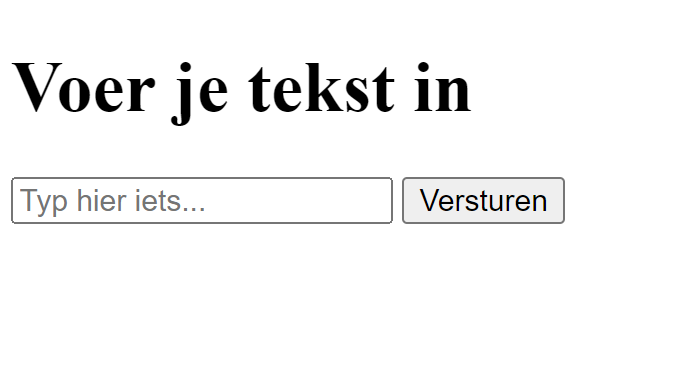

Daarna is de werkende modellering code hierin omgezet.

Voor de interface is ChatGPT gebruikt. Dit is een tool waar nog niet vaak mee is gewerkt. In het interface-bestand (index.html) zit een combinatie van HTML, CSS en JavaScript.

Hierbij was het belangrijk dat er de mogelijkheid is om een vraag te typen en een antwoord te ontvangen (zie modeling), maar ook dat duidelijk zichtbaar is dat het model nog bezig is met het zoeken naar een antwoord. Dit is opgelost door een 'laadteken' en een timer toe te voegen. Hierdoor is te zien dat het systeem nog bezig is met het verwerken van de vraag en het zoeken naar een antwoord.

**Vervolgstappen**


---

Je kan dit ook nog toevoegen:

<div class="alert alert-block alert-success"><b>Success:</b> This alert box indicates a successful or positive action.</div>

<div class="alert alert-block alert-warning"><b>Example:</b> Use yellow boxes for examples that are not inside code cells, or use for mathematical formulas if needed. Typically also used to display warning messages.</div>

<div class="alert alert-block alert-info"><b>Tip:</b> Use blue boxes (alert-info) for tips and notes.</div>

<div class="alert alert-block alert-danger"><b>Danger:</b> This alert box indicates a dangerous or potentially negative action.</div>

Zo'n markdown block is gewoon HTML-code